# 3- Loading the Dataset as Pandas DataFrame

First and far most important thing is to be able to load the pandas Dataframe and to be able to view the information which 
required and which is not required. df.describe() & df.info() are good enough to inform us about if there are any duplicates
or null values in our data set. Since there were very small amount of null data so we decided to remove that. 

In [1]:
import pandas as pd
df=pd.read_csv('Shakespeare_data.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df.drop('Dataline',axis=1)
df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


Dataline column is something which is not needed so we are going to remove it.

# 4- EDA & Feature Engineering 

## 4.1- Feature Engineering

ActSceneline column has basically three different values so we are going to split into three columns to have three features
instead of one. Act means how many different acts has been there in a single play. Scene = ' How many Scenes are there in total
as well as the whole scene' and finally in single scene how many individual lines were spoken. 

In [2]:
actsceneline=df['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line
df1=df
df1['act']=actsceneline[0]
df1['scene']=actsceneline[1]
df1['line']=actsceneline[2]
df1['words_lines']=[len(i.split(' ')) for i in df1['PlayerLine']]
df1=df1.drop('PlayerLine',axis=1)
df1.head()

,Play,PlayerLinenumber,ActSceneLine,Player,act,scene,line,words_lines
3,Henry IV,1.0,1.1.1,KING HENRY IV,1,1,1,9
4,Henry IV,1.0,1.1.2,KING HENRY IV,1,1,2,9
5,Henry IV,1.0,1.1.3,KING HENRY IV,1,1,3,7
6,Henry IV,1.0,1.1.4,KING HENRY IV,1,1,4,7
7,Henry IV,1.0,1.1.5,KING HENRY IV,1,1,5,8


We have devised words_lines colum from indiviudal lines that have been spoken just to sum up. length of the line is directly
related to the face time and if a character has spoken more words it means he has much face time and it could be concluded
that he is the main character of the show or the most important character of the show. 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

## 4.2- EDA

### 4.2.1- Number of Players in Each Play Or Should i Say: Plays with wider plots & story

In [4]:
plays_players=(df.groupby(['Play','Player']).count())[['PlayerLinenumber']].reset_index(drop=False)[['Play']]

Text(0.5, 1.0, '4.2.1- Number of Players in Single Play')

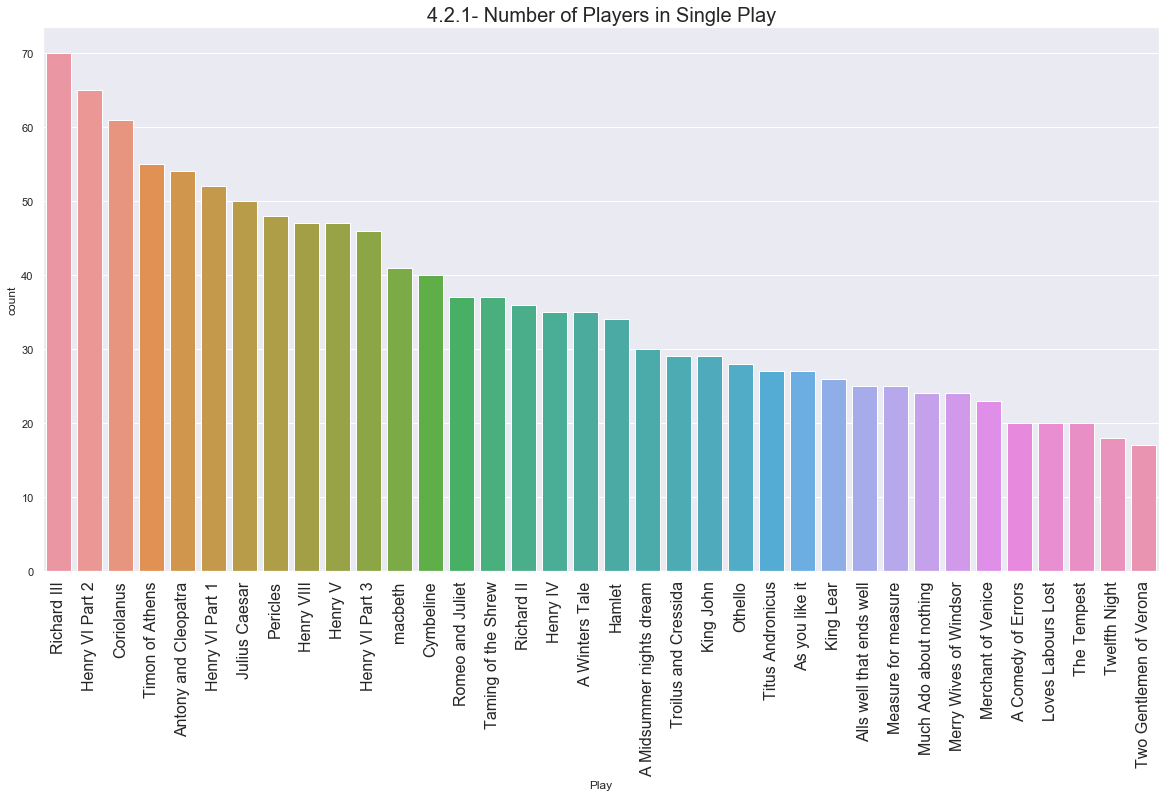

In [5]:
plt.figure(figsize = (20,10))
sns.countplot(x='Play', data=plays_players,order=plays_players['Play'].value_counts().index)
plt.xticks(rotation=90,fontsize=16)
plt.title('4.2.1- Number of Players in Single Play',fontsize=20)

Number of players in a single play provides us a lot more information about the story and depth of the play. From the above 
graph we can clearly estimate that if there are more characters in a play, it must mean more wider story. So Richard III
& Top10 have very wider plot. 

### 4.2.2- Most Common Players of all Plays: Characters with presence in more than 1 play

Text(0.5, 1.0, '4.2.2- Players with more than 1 play(Top50)')

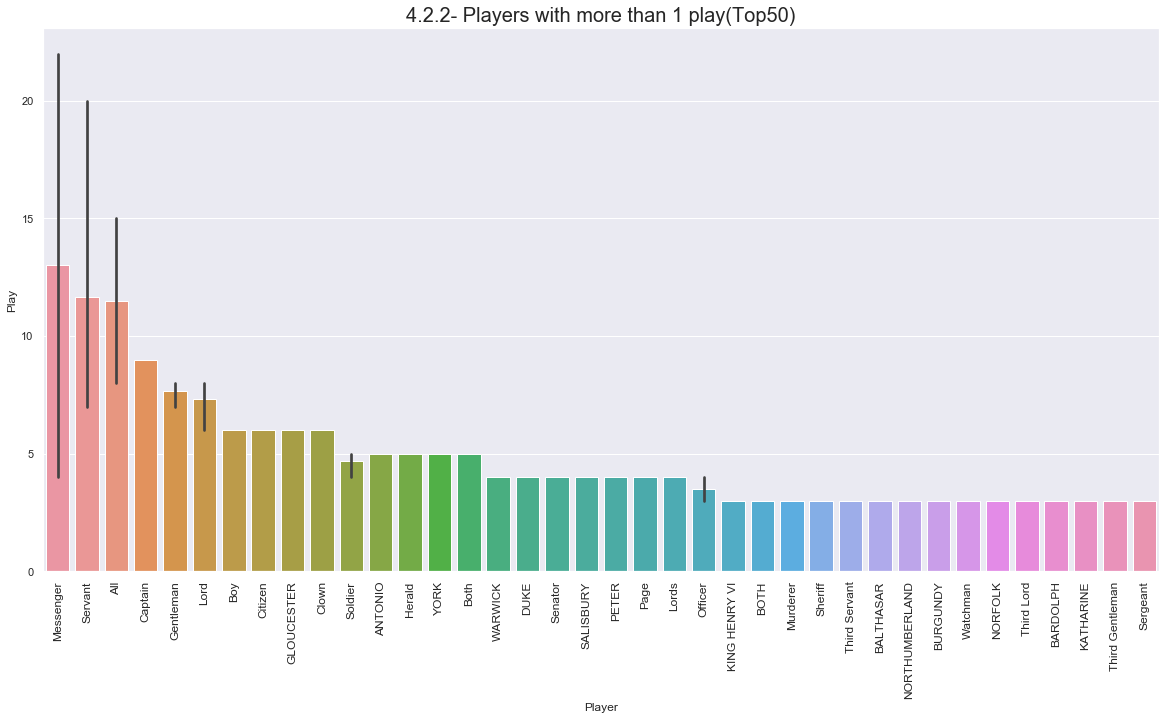

In [6]:
players_plays=(df.groupby(['Player','Play']).count())[['PlayerLinenumber']].reset_index(drop=False)[['Player','Play']]
df2=players_plays.groupby('Player').count().sort_values(by='Play',ascending=False).head(50).reset_index(drop=False)
df2['Player']=df2['Player'].str.replace('ALL','All')
df2['Player']=df2['Player'].str.replace('First ','')
df2['Player']=df2['Player'].str.replace('Second ','')
plt.figure(figsize = (20,10))
sns.barplot(x=df2['Player'], y=df2['Play'])
plt.xticks(rotation=90,fontsize=12)
plt.title('4.2.2- Players with more than 1 play(Top50)',fontsize=20)

This may well be considered as less attractive feature but the number of characters in the dataset who are there in other
plays as well. Although there are some names which might be written off but still there are some characters which tells 
about shakspeare's fondness with the characters like Gloucester, Anotonio etc. 

### 4.2.3- Longest Plays: More the lines, longer the duration !!!

Text(0.5, 1.0, '4.2.3- Plays with number of lines')

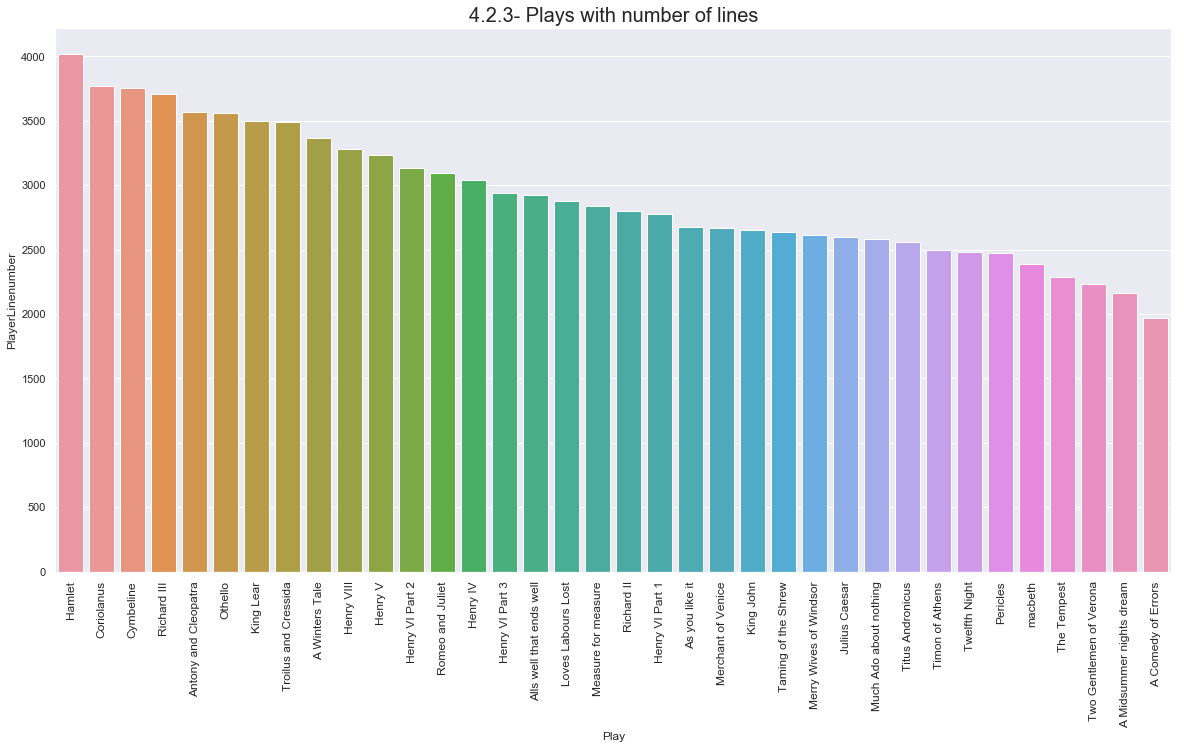

In [7]:
max_lines=(df.groupby(['Play']).count())[['PlayerLinenumber']].reset_index(drop=False)
max_lines=max_lines.sort_values(by=['PlayerLinenumber'],ascending=False).reset_index(drop=True)
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Play'], y=max_lines['PlayerLinenumber'])
plt.xticks(rotation=90,fontsize=12)
plt.title('4.2.3- Plays with number of lines',fontsize=20)

Above graph clearly shows in alphabetical order the shows which should be of longer durations than the others. 

### 4.2.4- Plays with highest amount of cinematography 

Text(0.5, 1.0, '4.2.4- Plays with number of scenes')

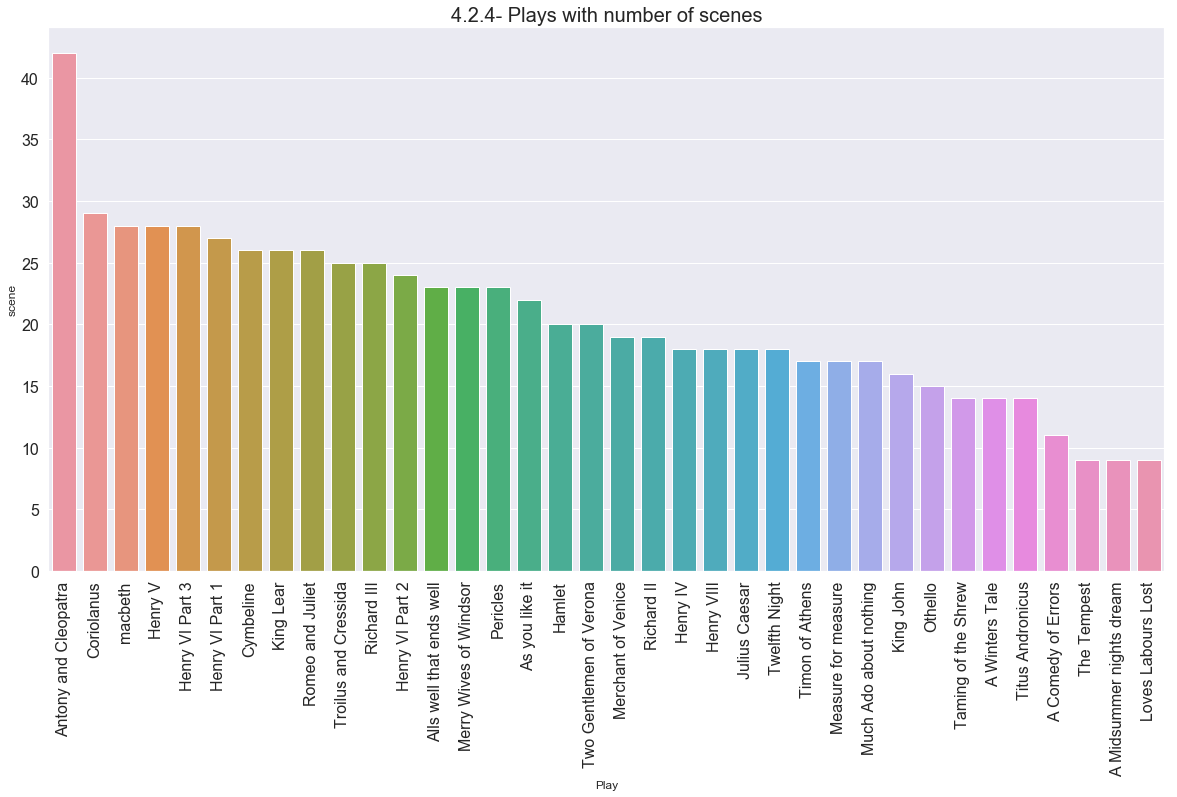

In [8]:
max_lines=(df.groupby(['Play','act','scene']).count()).reset_index(drop=False)[['Play','act','scene']].groupby(['Play'                                                                                                 ,'act']).count()
Play_with_max_scenes=max_lines.reset_index(drop=False)[['Play','scene']].groupby('Play').sum().reset_index(drop=False)
max_lines=Play_with_max_scenes.sort_values(by=['scene'],ascending=False).reset_index(drop=True)
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Play'], y=max_lines['scene'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title('4.2.4- Plays with number of scenes',fontsize=20)

Anothony & cleapethra clearly are miles a head compared to others with highest number of different scenes. 

### 4.2.5- Love Birds of Shakspeare

Text(0.5, 1.0, '4.2.5- Star Players of Shakspeare(Top20)')

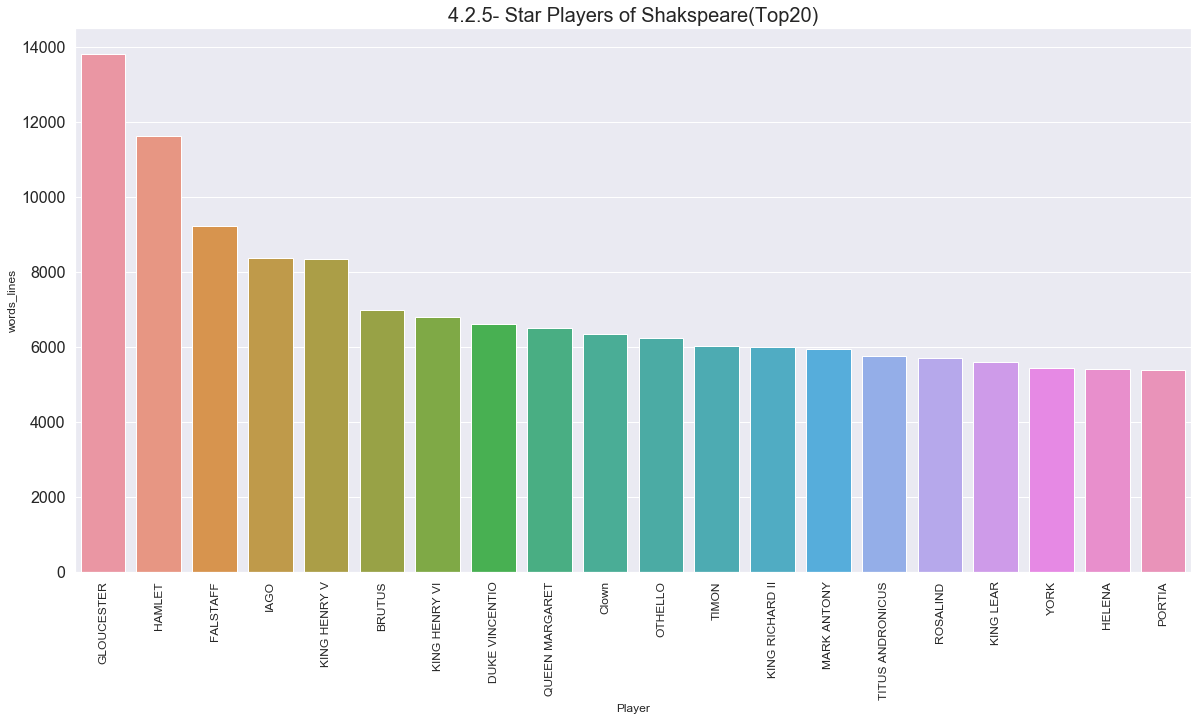

In [ ]:
facetime=df[['Player','words_lines']]
max_lines=facetime.groupby(['Player']).sum().reset_index(drop=False).sort_values(by=['words_lines'],ascending=False).reset_index(drop=True)[:20]
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Player'], y=max_lines['words_lines'])
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.title('4.2.5- Star Players of Shakspeare(Top20)',fontsize=20)

Above mentioned all characters of shakspeare are the higest number of line\words holders of shakspeare. 

### 4.2.6- Frequency Distribution of all Categorical Variables within Shakpears Dataset

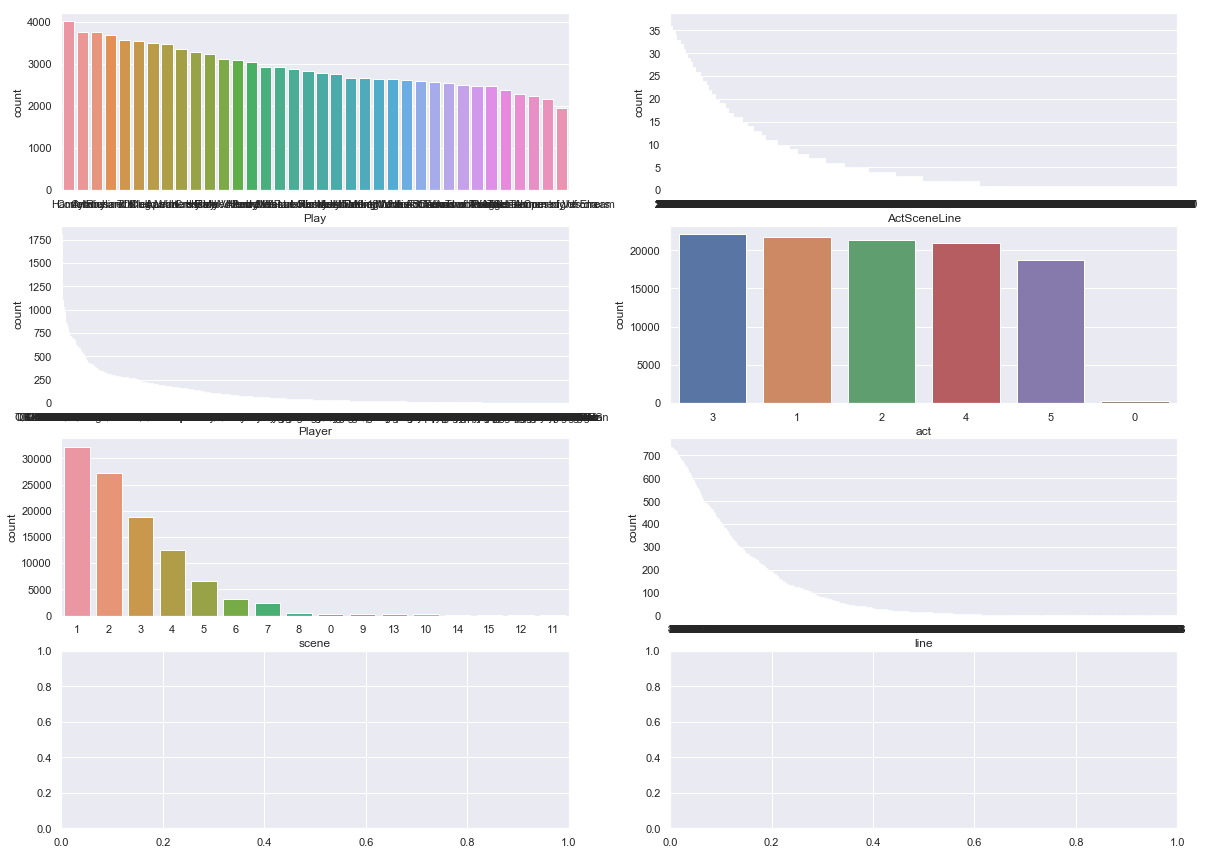

In [ ]:
df2=df1.drop(['words_lines','PlayerLinenumber'],axis=1)

fig, ax = plt.subplots(4, 2, figsize=(20, 15))
for variable, subplot in zip(df2.columns, ax.flatten()):
    sns.countplot(df2[variable], ax=subplot,order=df2[variable].value_counts().index)
        

# 5-Classification

## 5.1- Data Preprocessing

This is the method for connverting the non-numerical data into numerical data.
What this method will do is basically convert the each column into an array and for the unique items in that particular
column, it will convert into particular index untill all unique words occur in the column. After that it will simply assign
the corresponding element index.

In [ ]:

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

data=pd.read_csv('Shakespeare_data.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data=data.drop('Dataline',axis=1)
actsceneline=data['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line
df1=data
df1['act']=actsceneline[0]
df1['scene']=actsceneline[1]
df1['line']=actsceneline[2]
df1['words_lines']=[len(i.split(' ')) for i in df1['PlayerLine']]
df1=df1.drop(['PlayerLine','ActSceneLine'],axis=1)
from sklearn.utils import shuffle
df2=shuffle(df1).reset_index(drop=True)
df2.head()


,Play,PlayerLinenumber,Player,act,scene,line,words_lines
0,A Comedy of Errors,54.0,ADRIANA,2,2,134,9
1,macbeth,5.0,LADY MACBETH,1,5,63,5
2,Romeo and Juliet,56.0,FRIAR LAURENCE,5,3,264,9
3,King Lear,47.0,EDGAR,5,3,165,2
4,King Lear,77.0,ALBANY,5,3,269,8


we are going to split our train & test data and features and label data now. 

In [ ]:
X=df2.drop(['Player'],axis=1)
Y=df2[['Player']]
df=pd.get_dummies(df2,columns=df2.columns)
X=df
Y=np.array(df2['Player'])
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

We have used above the pd.get dummies which is basically pandas version of one-hot encoding and it is much easier to implement.The reason we have used it get rid of the numerical data which might be picked up wrongly by our model. To avoid
that we have used it. Next Stop ! Building the model !! 

## 5.2- Naive-Bayes Classification

Naive-Bayes works on the probability principle or to be precise on the principle of conditional probability. 
The reason we have chosen this because it works well the categorical data. Although it tends to be a bit slower and not 
being used in abundance now a days but for the sake of comparison with logistic regression algoritham we are using it. 


In [ ]:
model=GaussianNB() # Model design
model.fit(X_train,Y_train) # Training our Gaussian NB Model

GaussianPredicted=model.predict(X_test) #testing of Gaussian NB Model
ACCU_GAUSS=metrics.accuracy_score(Y_test, GaussianPredicted)
print("GAUSSIAN NAIVE-BAYSE HAS ACCURACY OF: "+str(ACCU_GAUSS*100))
CONFUSION_MATRIX_GAUSSIAN=metrics.confusion_matrix(Y_test, GaussianPredicted)
print('confusion matrix: Naive-Bayse Classifier')
print(CONFUSION_MATRIX_GAUSSIAN)
print('------------------------------------')
print('classification report: Naive-Bayse Classifier')
print(metrics.classification_report(Y_test,GaussianPredicted))

## 5.3- Logistic Regression for classification 

Logistic regression is basically prediction based on the slope of line Y=mx+c formula.It is a lot faster compared to K nearst neighbors


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
print(model)
y_expect=Y_test
y_predict=model.predict(X_test)
print('classification Report: Logistic Regression')
print(metrics.classification_report(y_expect,y_predict))
print('----------------------------------------------')
print('Accuracy Score: Logistic Regression')
print(metrics.accuracy_score(y_expect,y_predict))